# Wind Turbine Induction Generator

### The scond part of design focuses on the effects of a non-optimum design.
#### In this part a new machine is designed with a smaller diameter and for this the mechanical constant is selected a high value. So the machine dimensions will decrease but it will cause saturization in some parts and the efficiency will drop.

In [3]:
Power=250000 #Power
p=8 #Pole number
Vph=230 #Phase voltage
f=50 #Frequency
ɳ=0.9 #Target Efficiency 
PF=0.85 #Target Power Factor

### Main Dimensions

#### Mechanical constant is selected from the below figure.

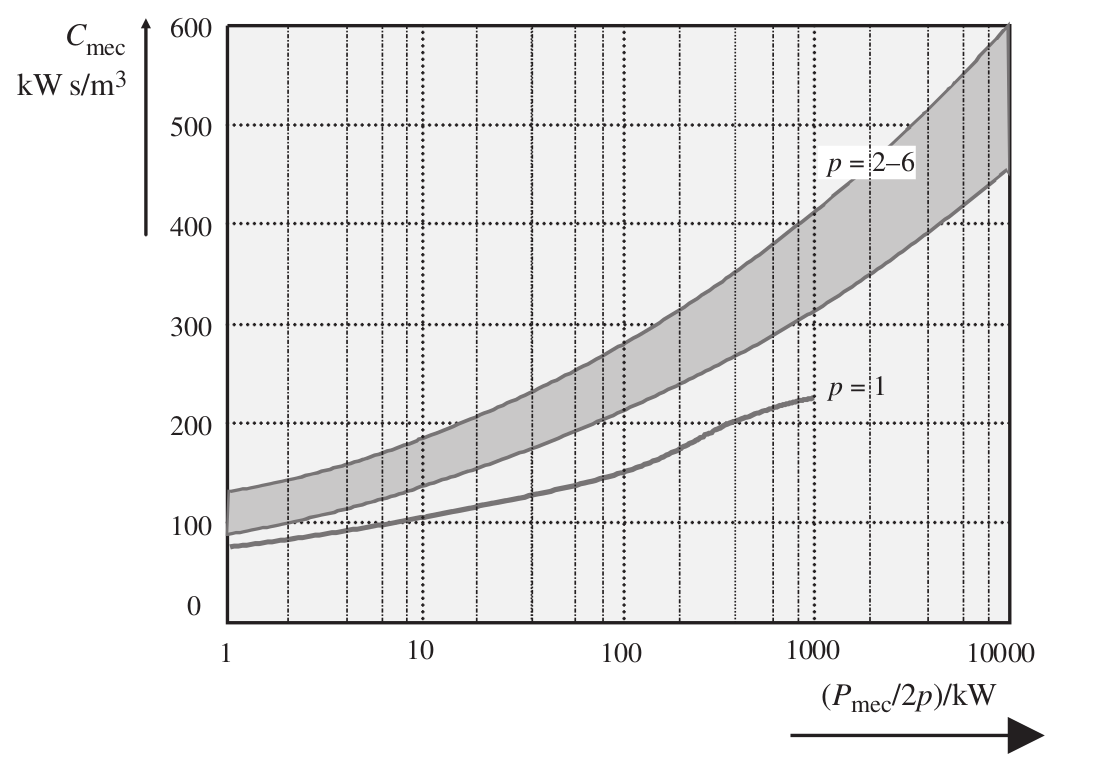

In [4]:
from IPython.display import Image
Image(filename='Images/Cmech.png', width=700, height=700)

In [5]:
import math
Ppp=Power/p #Power per pole
print ('Power per pole =',Ppp,'w')

Power per pole = 31250.0 w


In [7]:
Cmech=280000 #mechanical constant selection
Pp=p/2 #Pole Pair
n_syn=50/Pp #Synchronous speed
print('Synchronous speed =',n_syn,'Hz')

Synchronous speed = 12.5 Hz


In [8]:
from math import pi
X=(pi*(p**(1/3)))/(p) #X=L/D
Di=(Power/(Cmech*n_syn*X))**(1./3.) #Rotor Diameter
L=X*Di #Rotor Length
print ('Rotor Diameter = ',Di,'m')
print ('Length =',L,'m')

Rotor Diameter =  0.4497046321244779 m
Length = 0.3531971921418901 m


In [10]:
Airgap=(0.18+(0.006*(Power**(0.4))))*1e-3 #Airgap for a 8-pole machine
print ('Airgap =',Airgap,'m' ) 

Airgap = 0.0010456199435443284 m


In [11]:
q=3 #Slot per pole per phase number is selected 3
m=3 #3-phase machine
Qs=p*q*m #Total number of slots for stator side
print('Stator slot numbers=',Qs)
Ts=pi*Di/Qs
print ('Slot pitch =',Ts,'m')

Stator slot numbers= 72
Slot pitch = 0.019622066230105005 m


In [12]:
from math import sin
Wp=7/9 #Winding pitch is selected 7/9 to eliminate the 5th harmonic on voltage 
a_elec=pi*p/Qs #Electrical Pole Pitch Angle
pitch=Wp*pi
Kd=(sin(q*a_elec/2))/(q*sin(a_elec/2)) #Distribution Factor
Kp=sin(pitch/2) #Pitch Factor
Kw=Kd*Kp #Winding Factor
print ('Kd =',Kd)
print ('Kp =',Kp)
print ('Kw =',Kw)

Kd = 0.9597950805239389
Kp = 0.9396926207859083
Kw = 0.9019123546349621


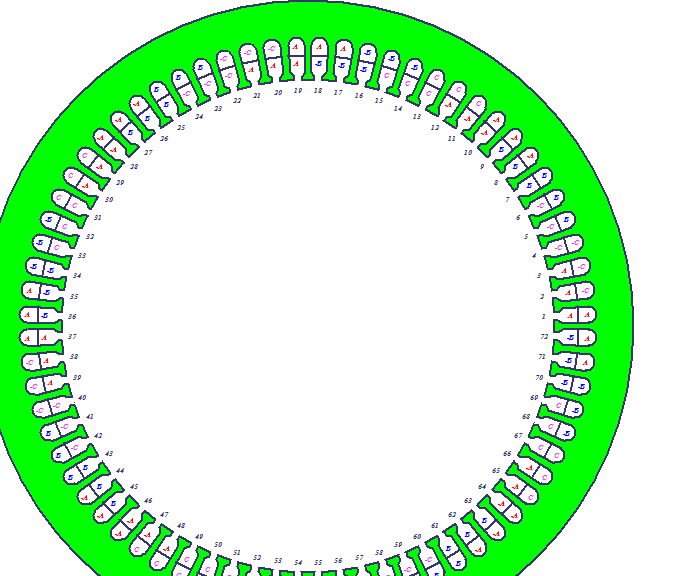

In [13]:
from IPython.display import Image
Image(filename='Images/winding.png', width=700, height=700)

In [14]:
Bg=0.5 #Air gap flux density is chosen 0.8 Tesla. From here we can calculate flux per pole and number of turns per phase.
Tp=(pi*Di)/(p) #Pole pitch 
Φp=Bg*Tp*L #Flux per Pole
print ('Pole pitch is',Tp,'m')
print ('Flux per pole =',Φp,'Wb')

Pole pitch is 0.17659859607094505 m
Flux per pole = 0.03118706413422881 Wb


In [15]:
KE=0.98-(0.005*Pp) #Induced voltage over teminal voltage ration.
Kf=1.08 #Tooth saturization factor 
Nph=(KE*Vph)/(4*Kf*Kw*f*Φp)
Ns=Nph/(Pp*q)
print('Calculated turns per phase =',Nph,'turns')
print('Calculated turns per slot =',Ns,'turns')

Calculated turns per phase = 36.34180455931988 turns
Calculated turns per slot = 3.028483713276657 turns


In [16]:
Nph=36 #Number of turns should be even
Ns=Nph/(Pp*q)
print('Revised turns per phase =',Nph,'turns')
print('Revised turns per slot =',Ns,'turns')

Revised turns per phase = 36 turns
Revised turns per slot = 3.0 turns


In [17]:
Iph=Power/(PF*ɳ*Vph*3) #Phase current
print('Iph =',Iph,'A')

Iph = 473.61939945060146 A


In [18]:
from math import sqrt
Jcos=7 #recommended current density for an 8-pole (Ampere/mm2)
Aco=Iph/Jcos #required wire cross section (mm2)
dco=sqrt(4*Aco/(pi)) #wire gauge diameter (mm) 
print('Wire cross section =',Aco, 'mm2')
print('Wire gauge diameter',dco, 'mm')

Wire cross section = 67.65991420722878 mm2
Wire gauge diameter 9.281555815811924 mm


In [19]:
a=30 #number of parallel conductors to reduce dco
Aco=Iph/(Jcos*a)
dco=sqrt(4*Aco/(pi))
print('Wire cross section =',Aco, 'mm2')
print('Wire gauge diameter',dco, 'mm')

Wire cross section = 2.2553304735742925 mm2
Wire gauge diameter 1.694572496354485 mm


In [20]:
dco=1.828 #wire diameter is selected from AWG standards
Kf=0.55#Fill factor for bog machines
Ks=0.5 #Stranding Factor
Asu=(pi*(dco**(2.))*a*Ns)/(4*Kf*Ks)
print ('Required area of slot =',Asu*1e-6,'m2')

Required area of slot = 0.0008589187428343523 m2


### Stator Dimensions

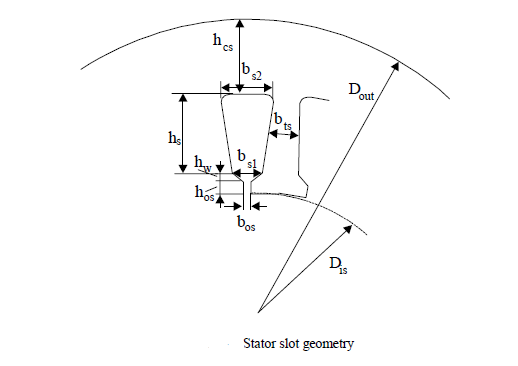

In [21]:
#Slot shape is chosen as figure below
from IPython.display import Image
Image(filename='Images/slotshape.png', width=700, height=700)

In [22]:
from math import tan
Bt=1.4 #Tooth flux density (T) to prevent saturization in the tooth
Kfe=0.95 
b_ts=((Bg*Ts)/(Kfe*Bt))
h_os=0.001
h_w=0.001
b_s1=(pi*(Di+2*(h_os+h_w+Airgap))/Qs)-(b_ts)
b_s2=0.019 
h_s=((2*(Asu*1e-6))/(b_s1+b_s2))
b_os=3*1e-3 
print('b_ts =',b_ts,'m')
print('b_s1 =',b_s1,'m')
print('h_os =',h_os,'m')
print('b_os =',b_os,'m')
print('h_w =',h_w,'m')
print('b_s2 =',b_s2,'m')
print('h_s =',h_s,'m')

b_ts = 0.007376716627859025 m
b_s1 = 0.012511130081142243 m
h_os = 0.001 m
b_os = 0.003 m
h_w = 0.001 m
b_s2 = 0.019 m
h_s = 0.05451526115519227 m


In [23]:
B_bc=1.4 #Back core flux density
h_cs=Φp/(2*L*B_bc) #Back core width 
print('h_cs =',h_cs,'m')

h_cs = 0.03153546358409733 m


In [24]:
Dout=Di+2*(h_s+h_os+h_w+h_cs)
print('Dout =',Dout,'m')

Dout = 0.6258060816030571 m


### Rotor Dimensions

In [25]:
Qr=56 #Rotor side slot numbers according to ABB standards for a 72 stator slot number and to have tooth width bigger that 1mm 
print('Rotor slot numbers=',Qr)

Rotor slot numbers= 56


In [26]:
KI=(0.8*PF)+0.2 #A Constant to have stator MMF higher than Rotor MMF
Ib=(KI*2*3*Nph*Kw*Iph)/Qr
print ('Ib =',Ib,'A')

Ib = 1449.9139058801 A


In [27]:
Jb=3.42 #Current density in the bars (A/mm2)
Ab=Ib/(Jb*1e6) #Area pf each bar (m2)
print('Ab =',Ab,'m2')

Ab = 0.0004239514344678655 m2


In [28]:
Tr=(pi*(Di-(2*Airgap)))/Qr #Rotor slot pitch
print ('Tr =',Tr,'m')

Tr = 0.02511105258395337 m


In [29]:
Btr=1.6 #Rotor tooth flux density
b_tr=Bg*Tr/(Btr*0.96) #Rotor tooth width to prevent rotor flux density from saturization
print ('b_tr =',b_tr,'m')

b_tr = 0.008174170763005655 m


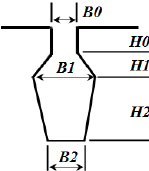

In [30]:
#Rotor slot shape is chosen as figure below
from IPython.display import Image
Image(filename='Images/rotorslot.png', width=300, height=300)

In [32]:
h_or=1e-3
b_or=1.5e-3
Dre=Di-2*Airgap
b_1=0.012
b_2=0.01
h_r=0.042
Ab=(b_1+b_2)*h_r/2 #Achieved slot area for bars should be greater than required area 
print('Dre =',Dre,'m')
print('b_1 =',b_1,'m')
print('b_2 =',b_2,'m')
print ('h_r',h_r,'m')
print ('Ab =',Ab,'m2') 

Dre = 0.4476133922373893 m
b_1 = 0.012 m
b_2 = 0.01 m
h_r 0.042 m
Ab = 0.000462 m2


In [33]:
Fmg=1.2*Airgap*Bg/(1.256*1e-6)
H_ts=760 #Chosen from magnetization charactereristics of core to have tooth flux density around 1.55 tesla
H_tr=2460
Fmts=H_ts*(h_s+h_os+h_w)
Fmtr=H_tr*(h_r+h_or) #Rotor and Stator MMF should be approximately equal.
print('Airgap MMF =',Fmg,'Aturns')
print('Stator tooth MMF =',Fmts,'Aturns')
print ('Rotor tooth MMF =',Fmtr,'Aturns')

Airgap MMF = 499.4999730307302 Aturns
Stator tooth MMF = 42.95159847794613 Aturns
Rotor tooth MMF = 105.78000000000002 Aturns


In [34]:
B_br=1.4 #Back rotor flux density
b_br=Φp/(2*L*B_br) #Back rotor width
Dir=Dre-2*(h_r+h_or+b_br) #Inner rotor diameter
print ('Back rotor width =',b_br,'m')
print('Dir=',Dir,'m')

Back rotor width = 0.03153546358409733 m
Dir= 0.2985424650691946 m


In [35]:
#Form catalogues standard shaft diameter for 250kw 8-pole machines is 100 mm
D_shaft=0.1
print ('D_shaft =',D_shaft,'m')

D_shaft = 0.1 m


In [36]:
Ier=Ib/(2*sin(2*180/Qr))
Jer=0.75*Jb
Aer=Ier/(Jer*1e6)
print ('Ier =',Ier,'A')
print ('Aer =',Aer,'m2')

Ier = 5004.034604776995 A
Aer = 0.0019508906841235849 m2


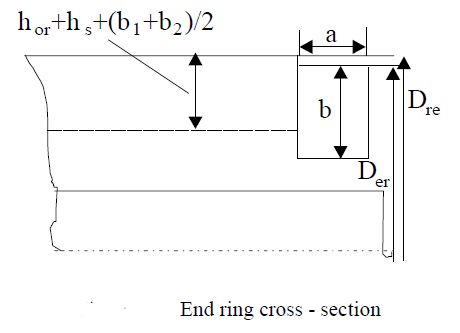

In [37]:
from IPython.display import Image
Image(filename='Images/endring.jpg', width=700, height=700)

In [40]:
Der=Dre-0.005 #In general
br=(h_r+h_or)
ar=Aer/br
print('Dre =',Dre)
print ('b =',br,'m')
print ('a =',ar,'m')

Dre = 0.4476133922373893
b = 0.043000000000000003 m
a = 0.04536955079357174 m


### Simulation Results

#### Designed machine has been done in Maxwell software RMxprt. Stator and Rotor dimensions and winding characteristics are entered and results are achieved in the following tables.

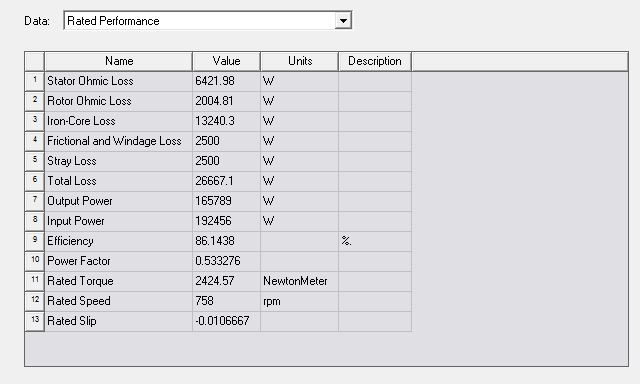

In [70]:
from IPython.display import Image
Image(filename='Images/2nd performance.jpg', width=700, height=700)

#### In the second design the output power and efficiency has been dropped dramatically. The power factor is reduced, it is caused by the increase of magnetizing current. The dimensions have been decreased and so some parts of core or teeth are in saturization point. It causes the increase of magnetizing current.

#### The below table shows the increase of magnetizing current.

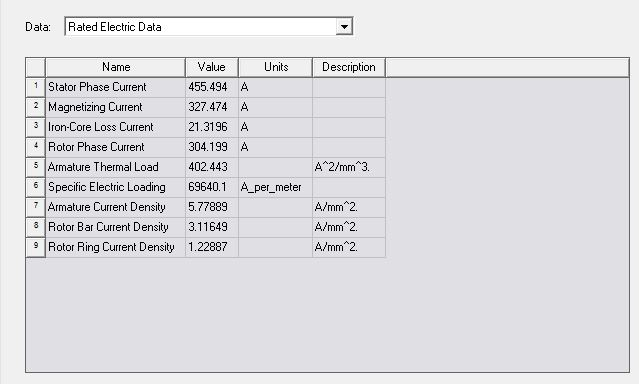

In [71]:
from IPython.display import Image
Image(filename='Images/2nd current.jpg', width=700, height=700)

#### The phase current is 455 A but the magnetizing current is increased in comparison with the previous results(77A).